In [1]:
import pandas as pd
import os

# Task 1 - Load in multiple CSV files and concatinate

### Step 1 - Loading multiple CSV and concatinating

In [2]:
path = "./Sales_Data"
files = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore hidden files

all_months_data = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path+"/"+file)
    all_months_data = pd.concat([all_months_data, current_data])
    
all_months_data.to_csv("all_data_copy.csv", index=False)

### Step 2 - Checking if data is imported correctly

In [3]:
all_months_data.head()
all_months_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 13621
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


### Step 3 - Load in the concatinated csv

In [4]:
df = pd.read_csv("all_data_copy.csv")

# Question 1: What was the best month for sales? how much was earned that month?

### Step 1 - Clean up the data

In [5]:
#Identify NaN rows
nan_df = df[df.isna().any(axis=1)]
nan_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
264,NaN,NaN,NaN,NaN,NaN,NaN
648,NaN,NaN,NaN,NaN,NaN,NaN
680,NaN,NaN,NaN,NaN,NaN,NaN
1385,NaN,NaN,NaN,NaN,NaN,NaN
1495,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185795,NaN,NaN,NaN,NaN,NaN,NaN
185868,NaN,NaN,NaN,NaN,NaN,NaN
185887,NaN,NaN,NaN,NaN,NaN,NaN
185960,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Drop all NaN rows
df = df.dropna(how="all")

In [7]:
# Find out where "Or" appear
temp_df = df[df["Order Date"].str[0:2] == "Or"]
temp_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
254,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
705,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1101,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2875,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3708,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
183671,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
184012,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
184041,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
184275,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [8]:
# Instead of deleting the duplicated headers, use not equal to select the ones that are not duplicates of header.
df = df[df["Order Date"].str[0:2] != "Or"]
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


### Step 2 - Slice month from Order Date and create a new column

In [9]:
df["Month"] = df["Order Date"].str[0:2]

### Step 3 - Convert types to correct type for calcualtion

In [10]:
df["Month"] = pd.to_numeric(df["Month"])
df["Quantity Ordered"] = pd.to_numeric(df["Quantity Ordered"])
df["Price Each"] = pd.to_numeric(df["Price Each"])

#Checking if the types have changed correctly
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Month             185950 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 11.3+ MB


In [11]:
#Alternative

#df["Month"] = df["Month"].astype("int32")
#df["Quantity Ordered"] = df["Quantity Ordered"].astype("int32")
#df["Price Each"] = df["Price Each"].astype("float32")

### Step 4 - Create a new column for Sales total by multiplying Price Each and Quantity Ordered

In [12]:
df["Sales Total"] = df["Price Each"] * df["Quantity Ordered"]
df.head(50)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales Total
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95
5,295670,AA Batteries (4-pack),1,3.84,12/31/19 22:58,"200 Jefferson St, New York City, NY 10001",12,3.84
6,295671,USB-C Charging Cable,1,11.95,12/16/19 15:10,"928 12th St, Portland, OR 97035",12,11.95
7,295672,USB-C Charging Cable,2,11.95,12/13/19 09:29,"813 Hickory St, Dallas, TX 75001",12,23.90
8,295673,Bose SoundSport Headphones,1,99.99,12/15/19 23:26,"718 Wilson St, Dallas, TX 75001",12,99.99
9,295674,AAA Batteries (4-pack),4,2.99,12/28/19 11:51,"77 7th St, Dallas, TX 75001",12,11.96


### Step 5 - Group by Month and see the Sum of Sales Total

In [13]:
df.groupby("Month").sum()

#If I wish to see just Sales Total
#df.groupby("Month").sum()["Sales Total"]

,Quantity Ordered,Price Each,Sales Total
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


### Step 6 - Plot a bar chart

<function matplotlib.pyplot.show(close=None, block=None)>

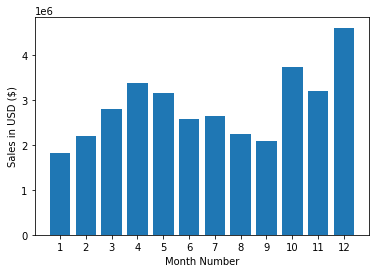

In [14]:
import matplotlib.pyplot as plt


results = df.groupby("Month").sum()

months = range(1,13)

# Months as x aes and result as y aes
plt.bar(months, results["Sales Total"])

# Adding legends
plt.xticks(months)
plt.ylabel("Sales in USD ($)")
plt.xlabel("Month Number")

plt.show

### Answer: Best - December with 4.613443 million in sales, Worst - Jan with 1.811768 million in sales

### Why this might be the case? Think of reasons it might be the case

# Question 2 : Which city code had the highest number in sales

### Step 1 - Create a column by getting two State code from the Purchase Address

In [15]:
df["State"] = df["Purchase Address"].str[-8:-6]
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales Total,State
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,NY
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,NY
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,NY
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,CA
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,GA
...,...,...,...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",6,2.99,MA
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",6,149.99,NY
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",6,11.95,CA
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",6,11.95,CA


### Step 2 - use .apply() function to get the City name form the Purchase Address

In [16]:
df["City"] = df["Purchase Address"].apply(lambda x: x.split(",")[1])
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales Total,State,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,NY,New York City
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,NY,New York City
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,NY,New York City
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,CA,San Francisco
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,GA,Atlanta


### Step 3 - Combine City and State

In [17]:
df["City State"] = df["City"] + ((" ")+("(")+(df["State"])+(")"))
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales Total,State,City,City State
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,NY,New York City,New York City (NY)
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,NY,New York City,New York City (NY)
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,NY,New York City,New York City (NY)
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,CA,San Francisco,San Francisco (CA)
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,GA,Atlanta,Atlanta (GA)
...,...,...,...,...,...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",6,2.99,MA,Boston,Boston (MA)
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",6,149.99,NY,New York City,New York City (NY)
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",6,11.95,CA,San Francisco,San Francisco (CA)
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",6,11.95,CA,San Francisco,San Francisco (CA)


### Step 4 - Group by City to get the sales number

In [18]:
df.groupby("City State").sum()

,Quantity Ordered,Price Each,Month,Sales Total
City State,,,,
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06
Austin (TX),11153,1.809874e+06,69829,1.819582e+06
Boston (MA),22528,3.637410e+06,141112,3.661642e+06
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06
New York City (NY),27932,4.635371e+06,175741,4.664317e+06
Portland (ME),2750,4.471893e+05,17144,4.497583e+05
Portland (OR),11303,1.860558e+06,70621,1.870732e+06
San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06


### Step 5 - Plot a bar chart

<function matplotlib.pyplot.show(close=None, block=None)>

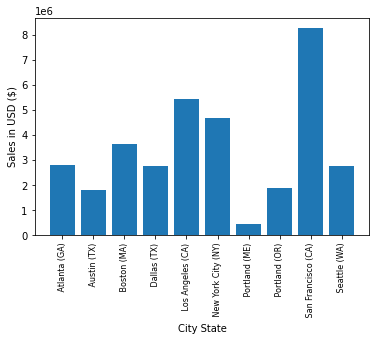

In [19]:
results = df.groupby("City State").sum()

# This is way to get values for x axes
city = [city for city, df in df.groupby("City State")]

# Months as x aes and result as y aes
plt.bar(city, results["Sales Total"])

# Adding legends
plt.xticks(city, rotation="vertical", size=8)
plt.ylabel("Sales in USD ($)")
plt.xlabel("City State")

plt.show

### Answer: Best - San Francisco (CA) 8.2M, Worst - Portland(ME) 447K

### Why this might be the case? Think of reasons it might be the case

# Question 3 - What time shall we display the adverting of our product to maximise ROI

In [20]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales Total,State,City,City State
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,NY,New York City,New York City (NY)
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,NY,New York City,New York City (NY)
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,NY,New York City,New York City (NY)
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,CA,San Francisco,San Francisco (CA)
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,GA,Atlanta,Atlanta (GA)
...,...,...,...,...,...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",6,2.99,MA,Boston,Boston (MA)
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",6,149.99,NY,New York City,New York City (NY)
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",6,11.95,CA,San Francisco,San Francisco (CA)
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",6,11.95,CA,San Francisco,San Francisco (CA)


### Step 1 - Turn Order Date to date and time format

In [21]:
# Checking what dtype is Order Date

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Month             185950 non-null  int64  
 7   Sales Total       185950 non-null  float64
 8   State             185950 non-null  object 
 9   City              185950 non-null  object 
 10  City State        185950 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 17.0+ MB


In [22]:
# Convert dtpe to date time

df["Order Date"] = pd.to_datetime(df["Order Date"])

# Checking if the dtype has changed
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   Month             185950 non-null  int64         
 7   Sales Total       185950 non-null  float64       
 8   State             185950 non-null  object        
 9   City              185950 non-null  object        
 10  City State        185950 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 17.0+ MB


### Step 2 - Split hour and minutues into seperate columns

In [23]:
df["Hour"] = df["Order Date"].dt.hour
df["Minute"] = df["Order Date"].dt.minute
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales Total,State,City,City State,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,NY,New York City,New York City (NY),0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,NY,New York City,New York City (NY),7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,NY,New York City,New York City (NY),18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,CA,San Francisco,San Francisco (CA),15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,GA,Atlanta,Atlanta (GA),12,38


### Step 3 - Group by Hour to see total sales by hour

In [24]:
df.groupby("Hour").sum()

,Quantity Ordered,Price Each,Month,Sales Total,Minute
Hour,,,,,
0,4428,709296.70,27554,713721.27,103596
1,2619,458490.00,16657,460866.88,61807
2,1398,233833.64,8507,234851.44,32508
3,928,144726.42,5904,145757.89,23044
4,937,162058.18,6148,162661.01,26876
5,1493,229621.21,9301,230679.82,42877
6,2810,445000.11,17539,448113.00,80343
7,4556,740568.11,28850,744854.12,127447
8,7002,1185970.62,43626,1192348.97,198135


### Step 4 - Find out top 3 Sales Total value and hours

In [25]:
# Create a temp table to calculate
temp_df = df.groupby("Hour").sum()
temp_df

,Quantity Ordered,Price Each,Month,Sales Total,Minute
Hour,,,,,
0,4428,709296.70,27554,713721.27,103596
1,2619,458490.00,16657,460866.88,61807
2,1398,233833.64,8507,234851.44,32508
3,928,144726.42,5904,145757.89,23044
4,937,162058.18,6148,162661.01,26876
5,1493,229621.21,9301,230679.82,42877
6,2810,445000.11,17539,448113.00,80343
7,4556,740568.11,28850,744854.12,127447
8,7002,1185970.62,43626,1192348.97,198135


In [26]:
# get top 3 highest Total Sales value and hours
temp_df['Sales Total'].nlargest(3)

Hour
19    2412938.54
12    2316821.34
11    2300610.24
Name: Sales Total, dtype: float64

### Step 4 - Create a new column with last 4 str off order date

Text(0.5, 0, 'Hour')

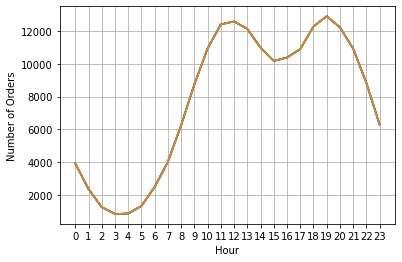

In [27]:
hours = [hour for hour, df in df.groupby("Hour")]

plt.plot(hours, df.groupby(["Hour"]).count())

# Adding legends
plt.xticks(hours)
plt.grid()
plt.ylabel("Number of Orders")
plt.xlabel("Hour")

### Answer : My recommendation is 12am and 7 pm

# Question 4 - What product is most often purchased with other products?

### Step 1 - Identify how I can tell if products are purchased together

In [ ]:
# My Thought procress
# 1. I can see there are duplicates of Order ID
# 2. Also Order Date can be used to identify which items were purchase together
# 3. Find Order IDs that are != not unique.
# 4. Find total number of quantity ordered for products

df.head(20)

In [29]:
df["Order ID"].unique()

array(['295665', '295666', '295667', ..., '222907', '222908', '222909'],
      dtype=object)

### Step 2 - Remove unique Order IDs

In [30]:
temp_df = df[df.duplicated(subset=["Order ID"], keep=False)]
temp_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales Total,State,City,City State,Hour,Minute
16,295681,Google Phone,1,600.00,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,600.00,MA,Boston,Boston (MA),12,37
17,295681,USB-C Charging Cable,1,11.95,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.95,MA,Boston,Boston (MA),12,37
18,295681,Bose SoundSport Headphones,1,99.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,99.99,MA,Boston,Boston (MA),12,37
19,295681,Wired Headphones,1,11.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.99,MA,Boston,Boston (MA),12,37
36,295698,Vareebadd Phone,1,400.00,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001",12,400.00,NY,New York City,New York City (NY),14,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...
186820,222882,AA Batteries (4-pack),1,3.84,2019-06-18 11:37:00,"990 Walnut St, Los Angeles, CA 90001",6,3.84,CA,Los Angeles,Los Angeles (CA),11,37
186822,222884,Google Phone,1,600.00,2019-06-04 12:06:00,"819 Pine St, New York City, NY 10001",6,600.00,NY,New York City,New York City (NY),12,6
186823,222884,USB-C Charging Cable,1,11.95,2019-06-04 12:06:00,"819 Pine St, New York City, NY 10001",6,11.95,NY,New York City,New York City (NY),12,6
186842,222903,iPhone,1,700.00,2019-06-07 22:21:00,"685 Hickory St, New York City, NY 10001",6,700.00,NY,New York City,New York City (NY),22,21


### Step 3 - Group by Product and sort

In [31]:
temp_df1 = temp_df.groupby("Product").sum()
temp_df1.sort_values(by = "Quantity Ordered", ascending = False)

,Quantity Ordered,Price Each,Month,Sales Total,Hour,Minute
Product,,,,,,
USB-C Charging Cable,2292,25226.45,14593,27389.40,30404,62035
Lightning Charging Cable,1949,27313.65,12797,29137.55,26865,54445
iPhone,1867,1306900.00,12880,1306900.00,27088,55673
Wired Headphones,1825,20071.26,11839,21881.75,23803,49325
Google Phone,1642,983400.00,11277,985200.00,23722,48516
AAA Batteries (4-pack),1251,2436.85,5921,3740.49,11748,23924
AA Batteries (4-pack),1013,2949.12,5512,3889.92,11090,23056
Apple Airpods Headphones,982,146100.00,6770,147300.00,14033,28457
Bose SoundSport Headphones,827,81991.80,5730,82691.73,11944,24796


### Step 4 - Ploting

<function matplotlib.pyplot.show(close=None, block=None)>

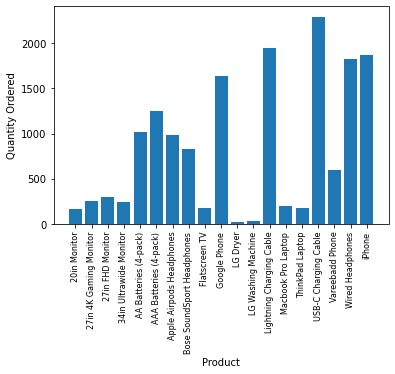

In [32]:
# This is way to get values for x axes
products = [product for product, temp_df1 in temp_df1.groupby("Product")]

# Months as x aes and result as y aes
plt.bar(products, temp_df1["Quantity Ordered"])

# Adding legends
plt.xticks(products, rotation="vertical", size=8)
plt.ylabel("Quantity Ordered")
plt.xlabel("Product")

plt.show

### Answer : USB-C Charging Cable

# Question 5 - Which products are often sold together?

### Step 1 - Create a new column with all Product names in a single column

In [33]:
temp_df["Grouped"] = temp_df.groupby("Order ID")["Product"].transform(lambda x: "," .join(x))
temp_df

<ipython-input-33-34f785848785>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df["Grouped"] = temp_df.groupby("Order ID")["Product"].transform(lambda x: "," .join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales Total,State,City,City State,Hour,Minute,Grouped
16,295681,Google Phone,1,600.00,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,600.00,MA,Boston,Boston (MA),12,37,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
17,295681,USB-C Charging Cable,1,11.95,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.95,MA,Boston,Boston (MA),12,37,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
18,295681,Bose SoundSport Headphones,1,99.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,99.99,MA,Boston,Boston (MA),12,37,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
19,295681,Wired Headphones,1,11.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.99,MA,Boston,Boston (MA),12,37,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,Vareebadd Phone,1,400.00,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001",12,400.00,NY,New York City,New York City (NY),14,32,"Vareebadd Phone,USB-C Charging Cable"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186820,222882,AA Batteries (4-pack),1,3.84,2019-06-18 11:37:00,"990 Walnut St, Los Angeles, CA 90001",6,3.84,CA,Los Angeles,Los Angeles (CA),11,37,"Apple Airpods Headphones,AA Batteries (4-pack)"
186822,222884,Google Phone,1,600.00,2019-06-04 12:06:00,"819 Pine St, New York City, NY 10001",6,600.00,NY,New York City,New York City (NY),12,6,"Google Phone,USB-C Charging Cable"
186823,222884,USB-C Charging Cable,1,11.95,2019-06-04 12:06:00,"819 Pine St, New York City, NY 10001",6,11.95,NY,New York City,New York City (NY),12,6,"Google Phone,USB-C Charging Cable"
186842,222903,iPhone,1,700.00,2019-06-07 22:21:00,"685 Hickory St, New York City, NY 10001",6,700.00,NY,New York City,New York City (NY),22,21,"iPhone,Lightning Charging Cable"


### Step 2 - Drop duplicates

In [34]:
temp_df2 = temp_df[["Order ID", "Grouped"]].drop_duplicates()
temp_df2

,Order ID,Grouped
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"
...,...,...
186798,222863,"27in FHD Monitor,Bose SoundSport Headphones"
186804,222868,"iPhone,Apple Airpods Headphones"
186819,222882,"Apple Airpods Headphones,AA Batteries (4-pack)"
186822,222884,"Google Phone,USB-C Charging Cable"


### Step 3 - Count product combinations by using pivot table

In [35]:
count = temp_df2.pivot_table(index=temp_df2["Grouped"], aggfunc='size')
count

Grouped
20in Monitor,20in Monitor                             3
20in Monitor,27in FHD Monitor                         2
20in Monitor,34in Ultrawide Monitor                   1
20in Monitor,AA Batteries (4-pack)                    6
20in Monitor,AAA Batteries (4-pack)                   3
                                                   ... 
iPhone,USB-C Charging Cable                          12
iPhone,Vareebadd Phone                                3
iPhone,Wired Headphones                             361
iPhone,Wired Headphones,Lightning Charging Cable      1
iPhone,iPhone                                         1
Length: 366, dtype: int64

### Step 4 - Turn it into a data frame to sort it in desending order

In [39]:
count_df = pd.DataFrame(count)
count_df.sort_values(by = 0, ascending = False)

,0
Grouped,
"iPhone,Lightning Charging Cable",882
"Google Phone,USB-C Charging Cable",856
"iPhone,Wired Headphones",361
"Vareebadd Phone,USB-C Charging Cable",312
"Google Phone,Wired Headphones",303
...,...
"LG Dryer,27in FHD Monitor",1
"LG Dryer,27in 4K Gaming Monitor",1
"Google Phone,Wired Headphones,USB-C Charging Cable",1


### Answer : iPhone, Lightning Charging cable with 882 orders

# Another way to get the counts - Can decide on how many items

In [42]:
from itertools import combinations
from collections import Counter

counter = Counter()

for row in temp_df2["Grouped"]:
    row_list = row.split(",")
    counter.update(Counter(combinations(row_list, 2))) #Number 2 means 2 times sold. When you type 3, it sorts it by 3 items.

counter.most_common(10)

for key, value in counter.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


# Question 6 - What product sold the most? and why do you think it sold the most

In [ ]:
# Though process
# 1. Need to associate product and quantity ordered to see how many are sold.
# 2. Create a new column for total quantity ordered for each product
# 3. Use groupby to see quantity ordered total
df

### Step 1 - Group by Product to find out Total Quantity Ordered per Product

In [53]:
temp_df4 = df.groupby("Product").sum()

#Another way to write this
#temp_df4 = df.groupby("Product")
#quantity_ordered = temp_df4.sum(["Quantity Ordered"])


### Step 2 - Sort it by Total Quantity Ordered

In [54]:
temp_df4.sort_values(by = "Quantity Ordered", ascending = False)

,Quantity Ordered,Price Each,Month,Sales Total,Hour,Minute
Product,,,,,,
AAA Batteries (4-pack),31017,61716.59,146370,92740.83,297332,612113
AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342,609039
USB-C Charging Cable,23975,261740.85,154819,286501.25,314645,647586
Lightning Charging Cable,23217,323787.10,153092,347094.15,312529,634442
Wired Headphones,20557,226395.18,133397,246478.43,271720,554023
Apple Airpods Headphones,15661,2332350.00,109477,2349150.00,223304,455570
Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43,192445,392603
27in FHD Monitor,7550,1125974.93,52558,1132424.50,107540,219948
iPhone,6849,4789400.00,47941,4794300.00,98657,201688


### Step 3 - Plot

<function matplotlib.pyplot.show(close=None, block=None)>

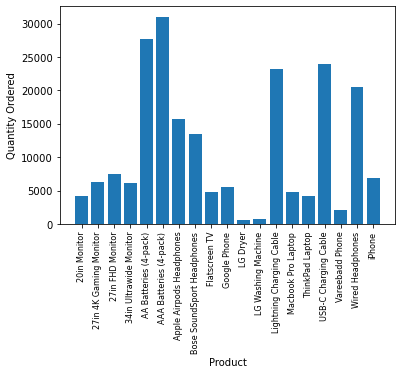

In [47]:
# This is way to get values for x axes
products = [product for product, temp_df4 in temp_df4.groupby("Product")]

# Months as x aes and result as y aes
plt.bar(products, temp_df4["Quantity Ordered"])

# Adding legends
plt.xticks(products, rotation="vertical", size=8)
plt.ylabel("Quantity Ordered")
plt.xlabel("Product")

plt.show

### Answer:
##### We can see that Batteries and Charging cables were the most popular products sold.
### Assumptions:
##### 1. Batteries run out of juice (given that these are not rechargeable
##### 2. Charging cables are known for breaking often
##### 3. Cheaper items such as accessories are purchased more often than expensive products.

#### Step 4 - Validating Assumptions

In [50]:
prices = df.groupby("Product").mean()["Price Each"]

In [51]:
print(prices)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


### Step 5 - Overlay mean price over the chart

<ipython-input-61-51dba27103d4>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation="vertical", size=8)


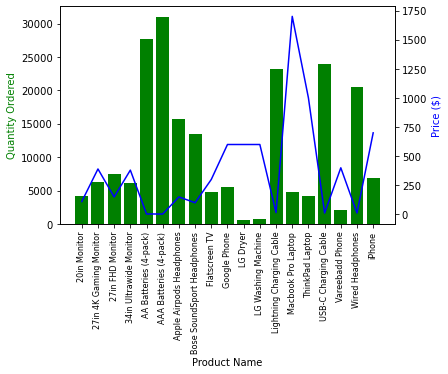

In [61]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, temp_df4["Quantity Ordered"], color="g")
ax2.plot(products, prices, "b-")

ax1.set_xlabel("Product Name")
ax1.set_ylabel("Quantity Ordered", color="g")
ax2.set_ylabel("Price ($)", color ="b")
ax1.set_xticklabels(products, rotation="vertical", size=8)

plt.show()

#This didn't really validate our assumptions